
# DS3010: Introduction to Machine Learning Lab – Week 7  
## **Decision Tree and Random Forest**  
**Name:** Parv Patel  
**Roll No:** 142301041  
**Lab:** Week 7 – Decision Tree & Random Forest

---

### **Objective**
To predict the *Air Quality Class (Good, Moderate, Poor)* using environmental pollutant data, and compare the interpretability and performance of **Decision Tree** and **Random Forest** models.

### **Tasks**
1. Data Preprocessing  
2. Decision Tree Classifier  
3. Random Forest Classifier  
4. Hyperparameter Tuning  
5. Model Interpretation and Discussion

---



## 1. Data Preprocessing (0.5 Marks)

Steps:
1. Load the dataset `air_quality_index_data.csv`  
2. Handle missing values using imputation (mean or median)  
3. Encode categorical feature `CityType`  
4. Split into train (80%) and test (20%) sets  
5. Visualize `AirQualityClass` distribution


In [1]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('air_quality_index_data.csv')
print("Shape:", df.shape)
df.head()


Shape: (1500, 10)


,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,CityType,AirQualityClass
0,105.513956,32.635006,41.071413,2.000000,1.273864,120.000000,28.793675,44.439007,Suburban,Poor
1,43.361347,64.304187,5.000000,39.452833,1.501232,17.677293,30.891814,51.923045,Urban,Poor
2,41.895526,57.259168,15.144523,13.451612,0.729909,65.539631,24.614294,80.064843,Urban,Good
3,70.949513,144.585958,38.677916,8.806856,1.072852,34.406483,22.620234,35.023268,Urban,Good
4,48.247282,128.395482,48.468654,9.385200,1.079867,23.935400,22.662873,59.029130,Rural,Good


In [2]:

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values (impute with median)
df.fillna(df.median(numeric_only=True), inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values per column:
PM2.5              0
PM10               0
NO2                0
SO2                0
CO                 0
O3                 0
Temperature        0
Humidity           0
CityType           0
AirQualityClass    0
dtype: int64

Missing values after imputation:
PM2.5              0
PM10               0
NO2                0
SO2                0
CO                 0
O3                 0
Temperature        0
Humidity           0
CityType           0
AirQualityClass    0
dtype: int64


In [3]:

# Encode CityType (categorical column) using LabelEncoder
if 'CityType' in df.columns:
    le = LabelEncoder()
    df['CityType'] = le.fit_transform(df['CityType'])
    print("CityType encoded successfully.")


CityType encoded successfully.


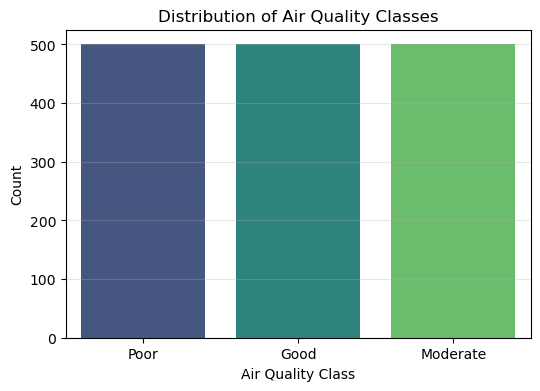

In [4]:

# Visualize AirQualityClass distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='AirQualityClass', palette='viridis')
plt.title("Distribution of Air Quality Classes")
plt.xlabel("Air Quality Class")
plt.ylabel("Count")
plt.grid(True, axis='y', alpha=0.3)
plt.show()


In [5]:

# Split data into features and target
X = df.drop(columns=['AirQualityClass'])
y = df['AirQualityClass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1200, 9)
Testing set shape: (300, 9)



## 2. Decision Tree Classifier (1.25 Marks)

Steps:
1. Train a `DecisionTreeClassifier` on training data  
2. Print classification report for train & test sets  
3. Display tree depth and number of leaves  
4. Visualize Decision Tree structure


In [6]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluation
print("Decision Tree - Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Decision Tree - Testing Classification Report:\n", classification_report(y_test, y_test_pred))

print("Tree Depth:", dt_model.get_depth())
print("Number of Leaves:", dt_model.get_n_leaves())


Decision Tree - Training Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
    Moderate       1.00      1.00      1.00       400
        Poor       1.00      1.00      1.00       400

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Decision Tree - Testing Classification Report:
               precision    recall  f1-score   support

        Good       0.75      0.68      0.71       100
    Moderate       0.50      0.56      0.53       100
        Poor       0.69      0.68      0.69       100

    accuracy                           0.64       300
   macro avg       0.65      0.64      0.64       300
weighted avg       0.65      0.64      0.64       300

Tree Depth: 16
Number of Leaves: 240


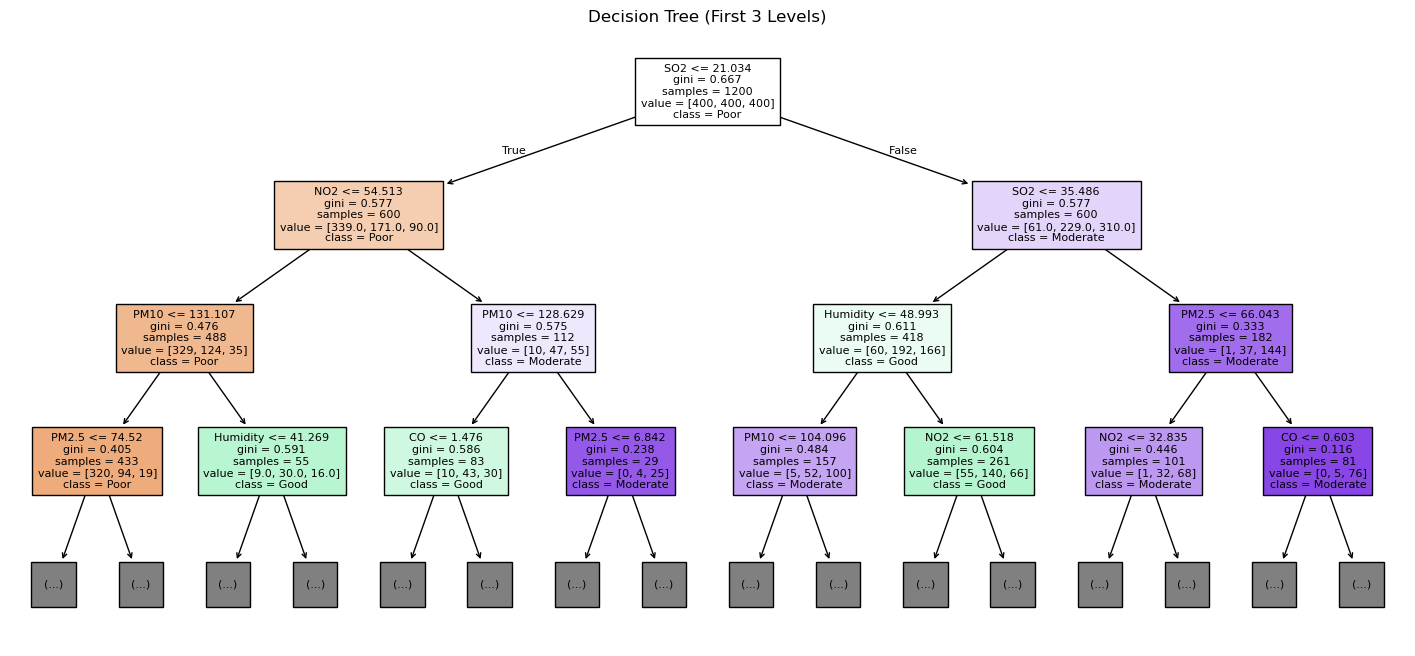

In [7]:

# Visualize Decision Tree structure (simplified view)
plt.figure(figsize=(18,8))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique(), filled=True, max_depth=3, fontsize=8)
plt.title("Decision Tree (First 3 Levels)")
plt.show()



## 3. Random Forest Classifier (1.25 Marks)

Steps:
1. Train a `RandomForestClassifier` on the same dataset  
2. Show classification reports for train & test sets  
3. Visualize feature importances  
4. Compare performance with Decision Tree and note overfitting


Random Forest - Training Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
    Moderate       1.00      1.00      1.00       400
        Poor       1.00      1.00      1.00       400

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Random Forest - Testing Report:
               precision    recall  f1-score   support

        Good       0.84      0.84      0.84       100
    Moderate       0.65      0.66      0.66       100
        Poor       0.81      0.80      0.80       100

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



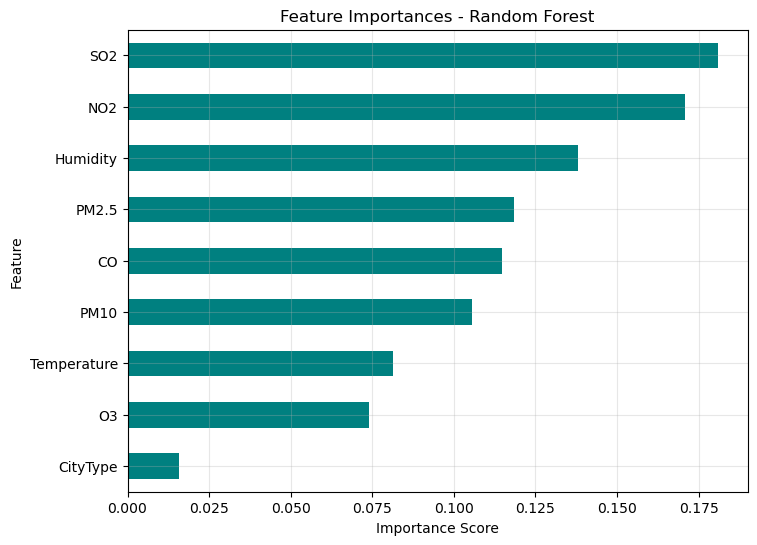

Decision Tree Test Accuracy: 0.6400
Random Forest Test Accuracy: 0.7667


In [8]:

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_rf = rf_model.predict(X_train)
y_test_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest - Training Report:\n", classification_report(y_train, y_train_rf))
print("Random Forest - Testing Report:\n", classification_report(y_test, y_test_rf))

# Feature Importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8,6))
importances.plot(kind='barh', color='teal')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True, alpha=0.3)
plt.show()

# Compare accuracy
acc_dt = accuracy_score(y_test, y_test_pred)
acc_rf = accuracy_score(y_test, y_test_rf)
print(f"Decision Tree Test Accuracy: {acc_dt:.4f}")
print(f"Random Forest Test Accuracy: {acc_rf:.4f}")



## 4. Hyperparameter Tuning (1 Mark)

- Use **GridSearchCV** for Decision Tree  
- Use **RandomizedSearchCV** for Random Forest  
- Compare tuned model results with base models


In [9]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Decision Tree GridSearch
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
dt_grid.fit(X_train, y_train)
print("Best Decision Tree Parameters:", dt_grid.best_params_)

best_dt = dt_grid.best_estimator_
y_pred_dt_best = best_dt.predict(X_test)
print("\nTuned Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt_best))


Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Decision Tree Classification Report:
               precision    recall  f1-score   support

        Good       0.73      0.81      0.77       100
    Moderate       0.47      0.41      0.44       100
        Poor       0.64      0.65      0.64       100

    accuracy                           0.62       300
   macro avg       0.61      0.62      0.62       300
weighted avg       0.61      0.62      0.62       300



In [10]:

# Random Forest RandomizedSearch
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_dist, cv=5, scoring='f1_macro', n_jobs=-1, n_iter=10, random_state=42)
rf_random.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_random.best_params_)

best_rf = rf_random.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
print("\nTuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_best))


Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

        Good       0.86      0.83      0.84       100
    Moderate       0.64      0.68      0.66       100
        Poor       0.80      0.78      0.79       100

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300




## 5. Model Interpretation and Discussion (1 Mark)

**Key Points:**
- Random Forest combines multiple Decision Trees → reduces variance and overfitting.  
- It averages multiple models → improves generalization and stability.  
- A single Decision Tree is more interpretable and faster to visualize but prone to overfitting.  
- In smaller datasets or where interpretability is crucial, a single tree might still be preferred.  

---
